# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=50)
lngs = np.random.uniform(low=-180.000, high=180.000, size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
len(cities)

41

In [6]:
cities

['hermanus',
 'kapaa',
 'vaini',
 'umm kaddadah',
 'rikitea',
 'avarua',
 'neuquen',
 'rungata',
 'ushuaia',
 'yellowknife',
 'ribeira grande',
 'hobart',
 'cockburn town',
 'albany',
 'pakwach',
 'sur',
 'itarema',
 'ken caryl',
 'busselton',
 'punta arenas',
 'roma',
 'sisimiut',
 'gornopravdinsk',
 'bay roberts',
 'campina verde',
 'chernyshevskiy',
 'meiganga',
 'karema',
 'ust-nera',
 'severo-kurilsk',
 'mujiayingzi',
 'hvide sande',
 'pecos',
 'fort-shevchenko',
 'grand river south east',
 'jamestown',
 'tsihombe',
 'tarauaca',
 'new norfolk',
 'hilo',
 'tumannyy']

In [7]:
weather_df = pd.DataFrame({"City":cities, "Cloudiness":'', "Country":countries, "Date":'', "Humidity":'',
                           "Lat":'', "Lng":'', "Max Temp":'', "Wind Speed":''})
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,,ZA,,,,,,
1,kapaa,,US,,,,,,
2,vaini,,TO,,,,,,
3,umm kaddadah,,SD,,,,,,
4,rikitea,,PF,,,,,,
5,avarua,,CK,,,,,,
6,neuquen,,AR,,,,,,
7,rungata,,KI,,,,,,
8,ushuaia,,AR,,,,,,
9,yellowknife,,CA,,,,,,


In [8]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
count = 1
count_set = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
 print("Begining Data Retrieval \n-----------------------")
    
for index, row in weather_df.iterrows():
    
    query_url = url + row["City"] + ',' + row["Country"] + "&appid=" + weather_api_key 
    
    response = requests.get(query_url)
    response_json = response.json()
    
    try:
        print(f'Processing Record {count} of Set {count_set} | {response_json["name"]}')
        
        weather_df.loc[index, "Cloudiness"] = response_json["clouds"]["all"]
        weather_df.loc[index, "Date"] = response_json["dt"]
        weather_df.loc[index, "Humidity"] = response_json["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response_json["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response_json["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response_json["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response_json["wind"]["speed"]
        
        count += 1
              
    except (KeyError,):
          print("City not found. Skipping....")
              
    if count == 20:
        count_set = 1
        count += 1
        time.sleep(60)
    
print("------------------------\n Data Retrieval Complete \n--------------------------")


Begining Data Retrieval 
-----------------------
Processing Record 37 of Set 1 | Hermanus
Processing Record 38 of Set 1 | Kapaa
Processing Record 39 of Set 1 | Vaini
Processing Record 40 of Set 1 | Umm Kaddadah
Processing Record 41 of Set 1 | Rikitea
Processing Record 42 of Set 1 | Avarua
Processing Record 43 of Set 1 | Neuquen
Processing Record 44 of Set 1 | Ushuaia
Processing Record 45 of Set 1 | Yellowknife
Processing Record 46 of Set 1 | Ribeira Grande
Processing Record 47 of Set 1 | Hobart
Processing Record 48 of Set 1 | Cockburn Town
Processing Record 49 of Set 1 | Albany
Processing Record 50 of Set 1 | Sur
Processing Record 51 of Set 1 | Itarema
Processing Record 52 of Set 1 | Ken Caryl
Processing Record 53 of Set 1 | Busselton
Processing Record 54 of Set 1 | Punta Arenas
Processing Record 55 of Set 1 | Roma
Processing Record 56 of Set 1 | Sisimiut
Processing Record 57 of Set 1 | Gornopravdinsk
Processing Record 58 of Set 1 | Bay Roberts
Processing Record 59 of Set 1 | Campina V

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# output to csv
weather_df["Max Temp"] = weather_df["Max Temp"].replace('',np.nan)
weather_df.dropna(axis=0, how="any", inplace=True)

weather_df.to_csv("output_data/weather_data.csv")

In [14]:
weather_df.count()

City          36
Cloudiness    36
Country       36
Date          36
Humidity      36
Lat           36
Lng           36
Max Temp      36
Wind Speed    36
dtype: int64

In [15]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,100,ZA,1580258943,97,-34.42,19.23,64.99,1.01
1,kapaa,1,US,1580258844,61,22.08,-159.32,80.60,6.93
2,vaini,75,TO,1580258943,79,-21.2,-175.2,84.20,5.82
3,umm kaddadah,0,SD,1580258943,19,13.6,26.69,57.13,10.67
4,rikitea,100,PF,1580258793,80,-23.12,-134.97,79.59,10.31
5,avarua,13,CK,1580258694,94,-21.21,-159.78,78.80,8.05
6,neuquen,50,AR,1580258943,20,-38.95,-68.06,77.00,13.87
8,ushuaia,75,AR,1580258840,81,-54.8,-68.3,42.80,32.21
9,yellowknife,90,CA,1580258721,77,62.46,-114.35,0.00,6.93
10,ribeira grande,75,PT,1580258944,93,38.52,-28.7,62.60,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

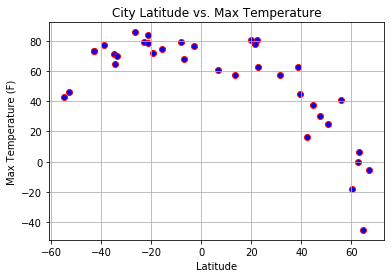

In [16]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values, marker='o', facecolors='blue', edgecolors="red")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs temp plot.png")
plt.show()

#### Latitude vs. Humidity Plot

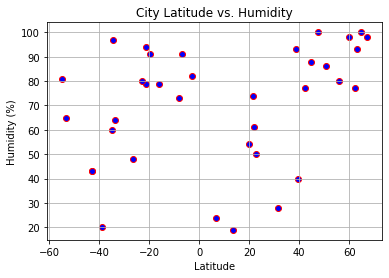

In [17]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker='o',facecolors='blue', edgecolors="red")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs humidity plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

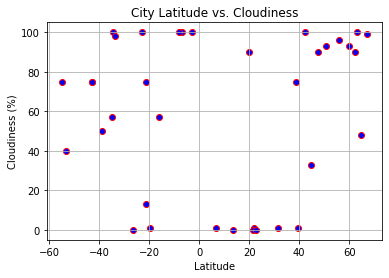

In [18]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker='o',facecolors='blue', edgecolors="red")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs cloudiness plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

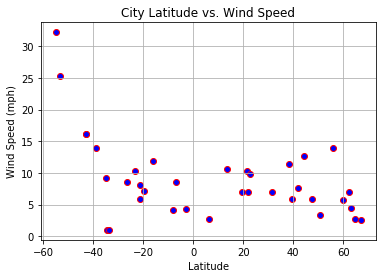

In [19]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker='o',facecolors='blue', edgecolors="red")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat vs wind speed plot.png")
plt.show()

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots

In [22]:
# Create Northern and Southern Hemisphere DataFrames
weather_df['Hemisphere'] = np.where(weather_df['Lat'] >= 0,'Nothern Hemisphere', 'Southern Hemisphere')
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,hermanus,100,ZA,1580258943,97,-34.42,19.23,64.99,1.01,Southern Hemisphere
1,kapaa,1,US,1580258844,61,22.08,-159.32,80.60,6.93,Nothern Hemisphere
2,vaini,75,TO,1580258943,79,-21.2,-175.2,84.20,5.82,Southern Hemisphere
3,umm kaddadah,0,SD,1580258943,19,13.6,26.69,57.13,10.67,Nothern Hemisphere
4,rikitea,100,PF,1580258793,80,-23.12,-134.97,79.59,10.31,Southern Hemisphere


In [24]:
nothern_df = weather_df.loc[weather_df['Hemisphere'] == 'Nothern Hemisphere']
nothern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
1,kapaa,1,US,1580258844,61,22.08,-159.32,80.60,6.93,Nothern Hemisphere
3,umm kaddadah,0,SD,1580258943,19,13.6,26.69,57.13,10.67,Nothern Hemisphere
9,yellowknife,90,CA,1580258721,77,62.46,-114.35,0.00,6.93,Nothern Hemisphere
10,ribeira grande,75,PT,1580258944,93,38.52,-28.7,62.60,11.41,Nothern Hemisphere
12,cockburn town,0,TC,1580258944,74,21.46,-71.14,77.79,10.25,Nothern Hemisphere


In [25]:
southern_df = weather_df.loc[weather_df['Hemisphere'] == 'Southern Hemisphere']
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,hermanus,100,ZA,1580258943,97,-34.42,19.23,64.99,1.01,Southern Hemisphere
2,vaini,75,TO,1580258943,79,-21.2,-175.2,84.20,5.82,Southern Hemisphere
4,rikitea,100,PF,1580258793,80,-23.12,-134.97,79.59,10.31,Southern Hemisphere
5,avarua,13,CK,1580258694,94,-21.21,-159.78,78.80,8.05,Southern Hemisphere
6,neuquen,50,AR,1580258943,20,-38.95,-68.06,77.00,13.87,Southern Hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8516320641764735


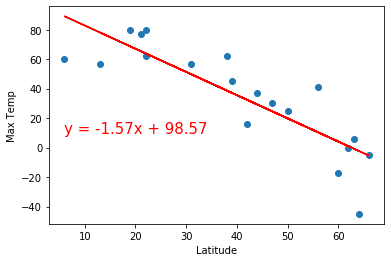

In [42]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Max Temp'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Max Temp vs Lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6234370867146987


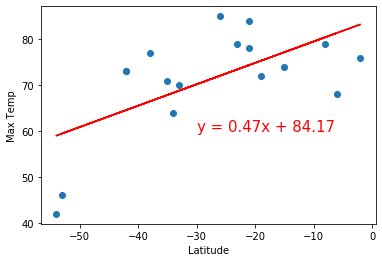

In [29]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Max Temp'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Max Temp vs Lat.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.7931726053331929


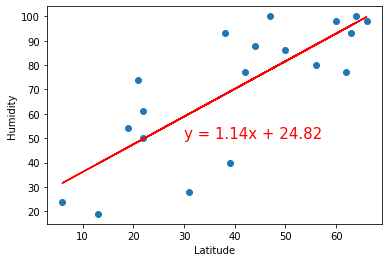

In [31]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Humidity'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Humidity(%) vs Lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4544344028538583


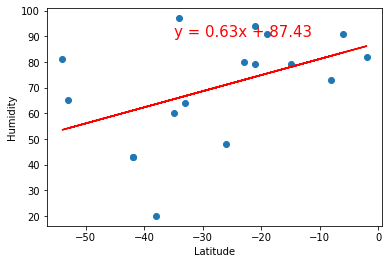

In [33]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Humidity'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Humidity(%) vs Lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.7152998397290882


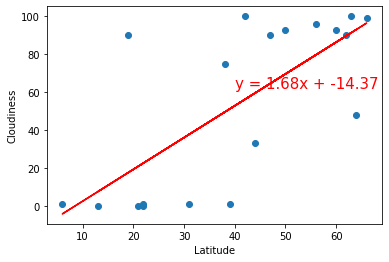

In [35]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Cloudiness'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,62),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Cloudiness(%) vs Lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15725178288929842


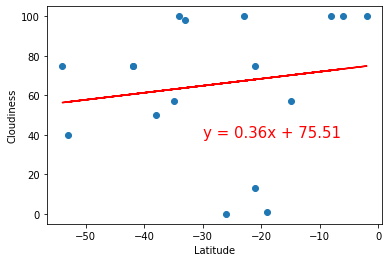

In [36]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Cloudiness'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,39),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Cloudiness (%) vs Lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23789216651740483


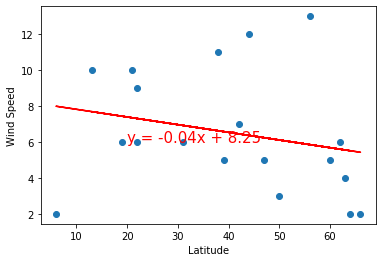

In [39]:
x_values = nothern_df['Lat'].astype(int)
y_values = nothern_df['Wind Speed'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,6),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Nothern Hem_Wind Speed (mph) vs Lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.7050932896425692


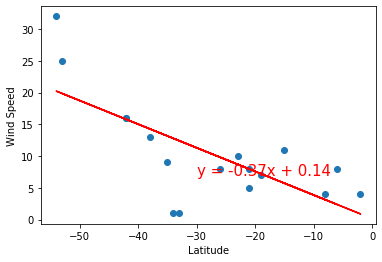

In [40]:
x_values = southern_df['Lat'].astype(int)
y_values = southern_df['Wind Speed'].astype(int)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Linear Regression/Southern Hem_Wind Speed (mph) vs Lat.png')
plt.show()